In [1]:
import sys
sys.path.append('/Users/kelly/koskella_lab')
from tools import *

In [111]:
df = pd.read_csv('/Users/kelly/Downloads/KH_RBG2_02122025.csv')
df = clean_and_transpose(df, 33, 131)
df1 = df.copy()

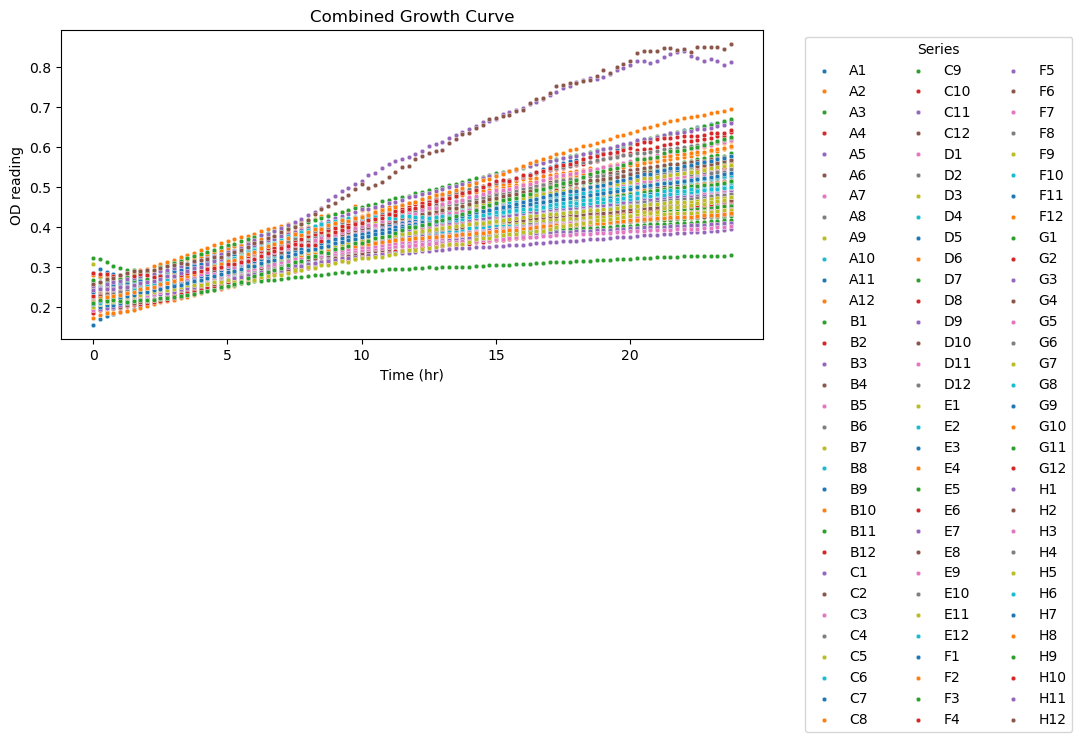

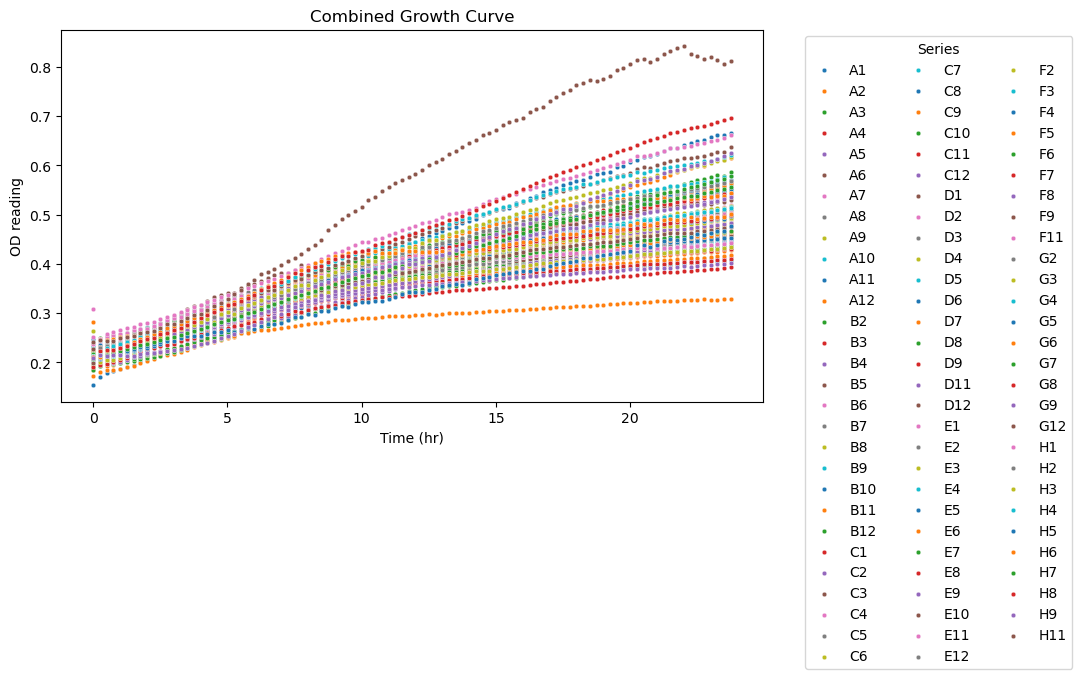

In [108]:
plot_timeseries(df, 'Combined Growth Curve')
clean_df = remove_outliers(df, 1)
plot_timeseries(clean_df, 'Combined Growth Curve')

In [109]:
#split into 4 tables of technical replicates
table_1 = df.filter(regex=r'^[A-H][1-3]$') 
table_2 = df.filter(regex=r'^[A-H][4-6]$')
table_3 = df.filter(regex=r'^[A-H][7-9]$')
table_4 = df.filter(regex=r'^[A-H](10|11|12)$')

table_arr = [table_1, table_2, table_3, table_4]
avg_tables = []

#average every 3 wells
for df in table_arr:
    avg_df = df.groupby(df.columns.str[0], axis=1).mean()
    avg_tables.append(avg_df)

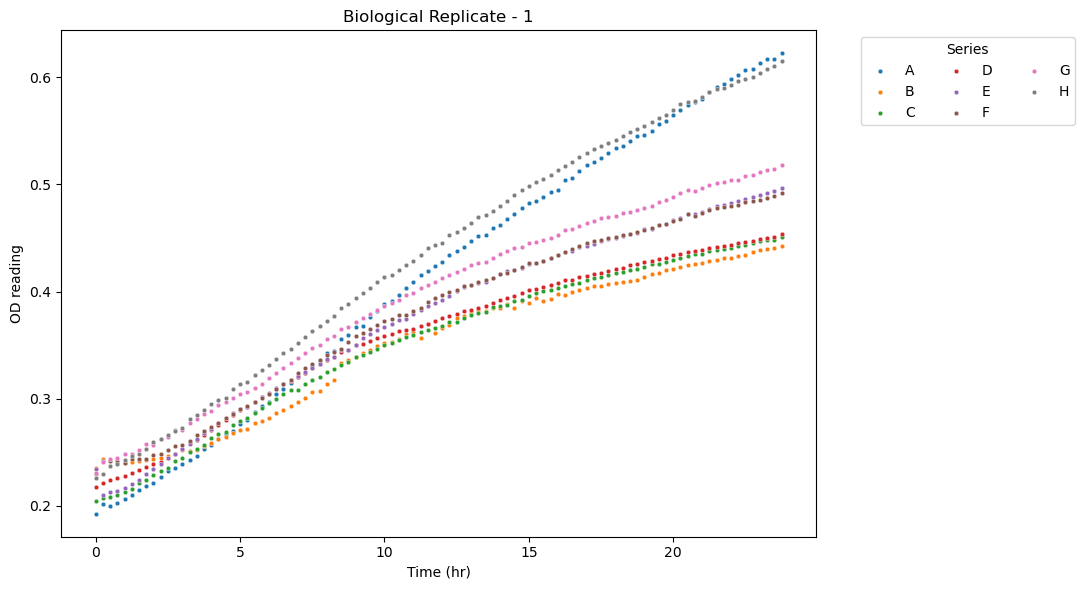

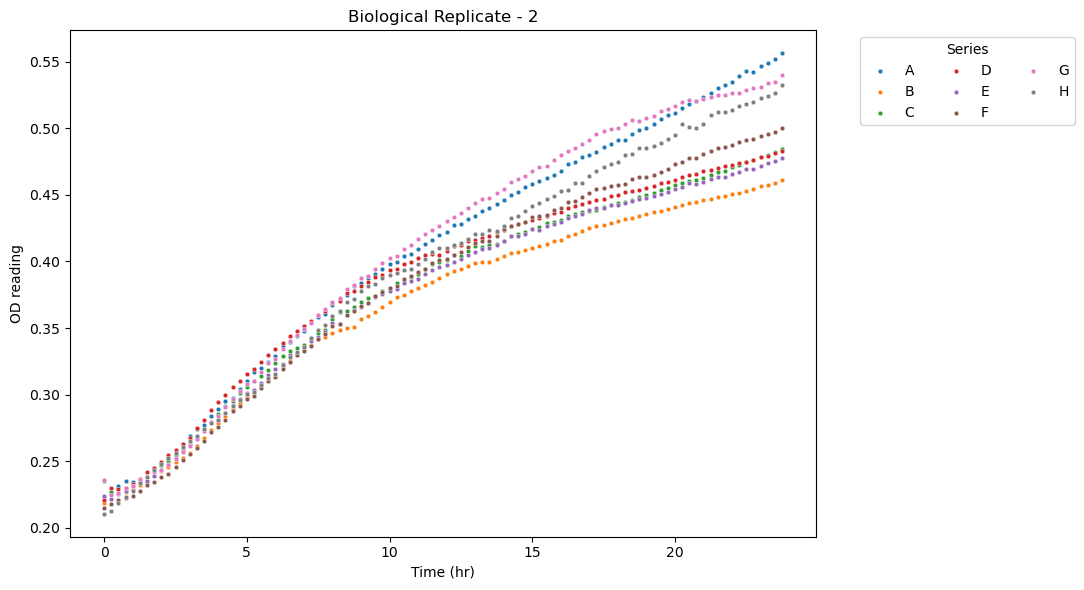

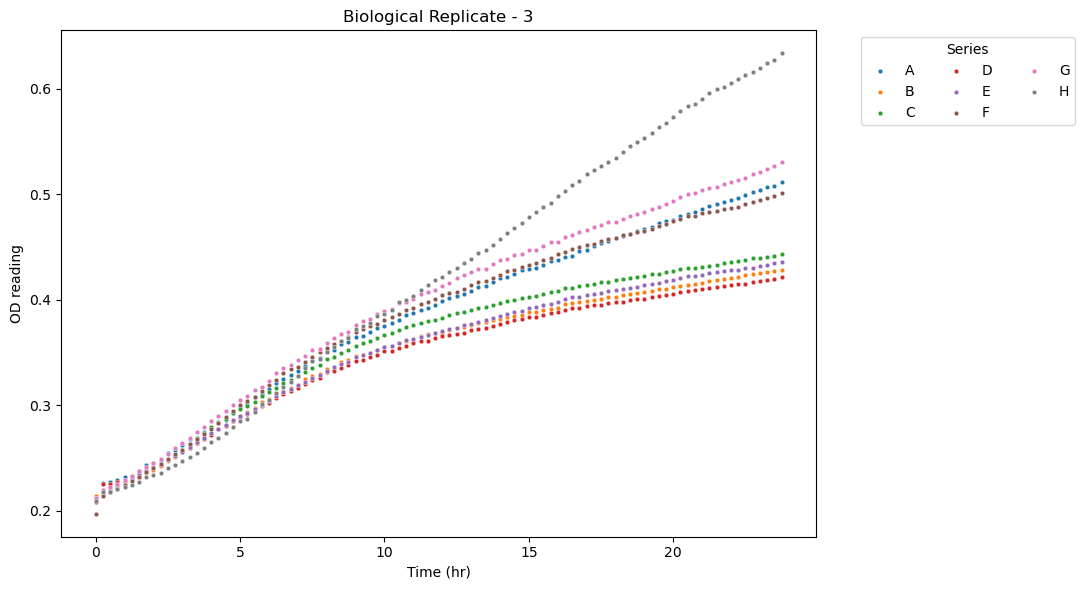

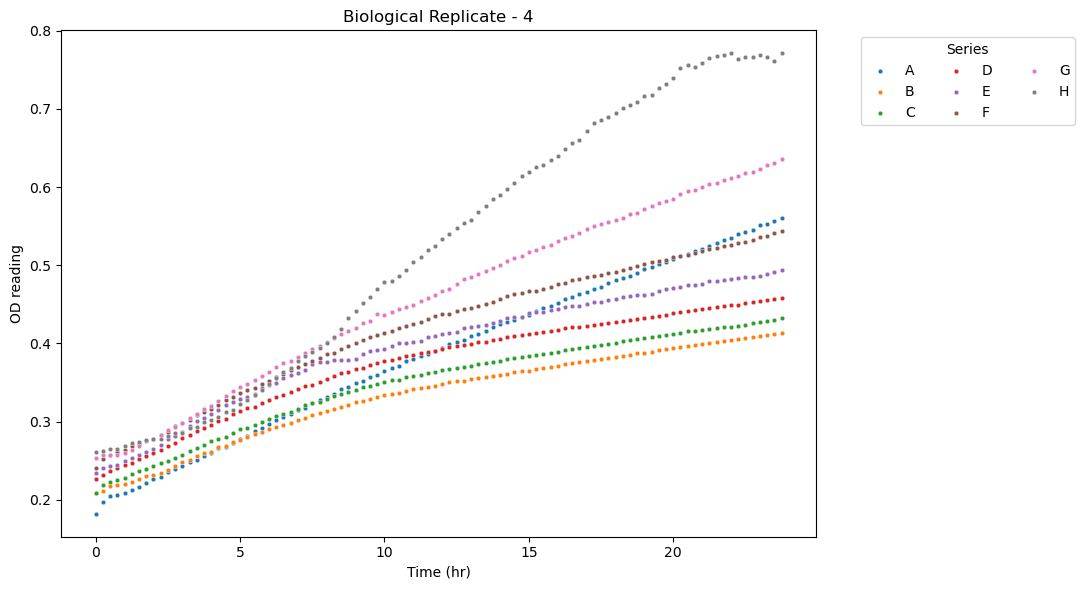

In [110]:
for i in range(1, 5):
    plot_timeseries(avg_tables[i-1], f'Biological Replicate - {i}')

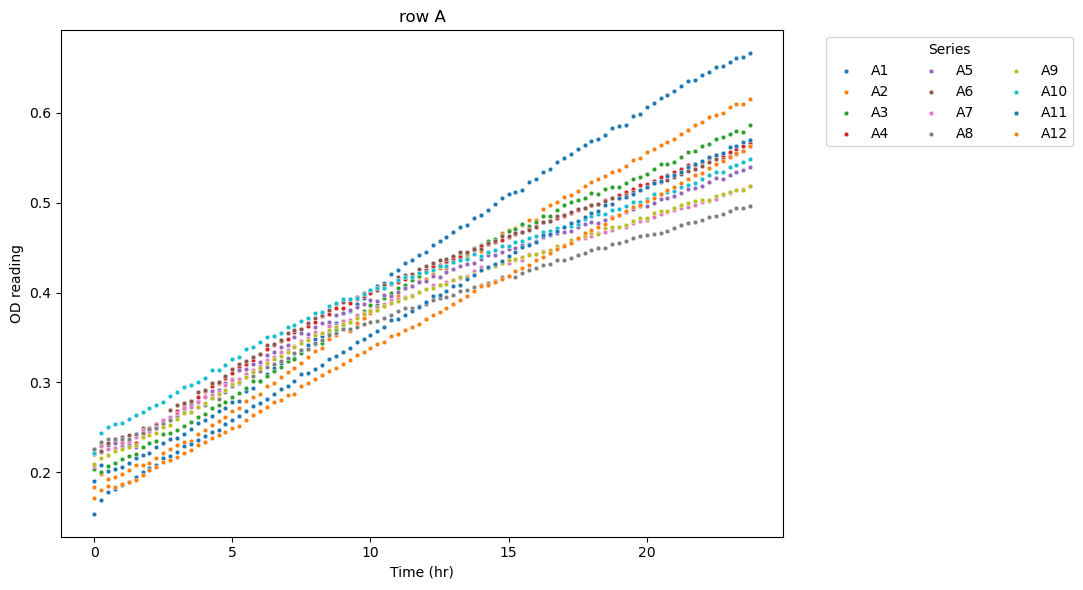

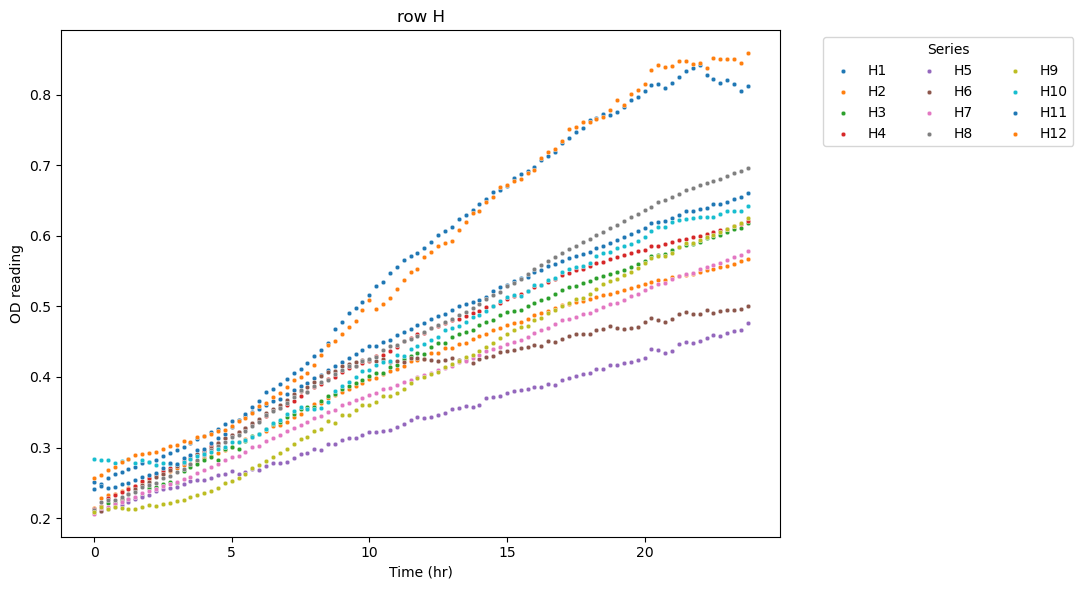

In [112]:
#plot all the As and Hs

table_A = df1.filter(regex=r'^A')
table_H = df1.filter(regex=r'^H')

plot_timeseries(table_A, 'row A')
plot_timeseries(table_H, 'row H')